<a href="https://colab.research.google.com/github/ChesneeMurdock/Multi-Class-Classifier/blob/main/Deep_Learning_with_a_Multi_Class_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep Learning with a Multi-Class Classifier**

## **Consists of 1 file:**

* stack_overflow_16k.tar.gz (*a compressed archive file with code to download the Stack Overflow dataset*

## **Contains:**

* Text files
* Subfolders consisting of:

1) '.config',

2) 'test',

3) 'README.md',

4) 'stack_overflow_16k',

5) 'train', and

6) 'sample_data'

## **Packages used:**

* import tensorflow as tf
* import matplotlib.pyplot as plt
* import os
* import re
* import shutil
* import string
* import sys
* import pathlib

* from tensorflow.keras import layers
* from tensorflow.keras import losses
* from tensorflow.keras import preprocessing
* from tensorflow.keras.layers import TextVectorization
* from tensorflow.keras import utils



# **Introduction to Multi-Class Classifier and Deep Learning**

### What is a Multi-Class Classifier?

A multi-class classifier in machine learning is a model that is designed to categorize input data into one of three or more possible classes; multi-class classification assigns each instance to one of several possible labels.

There are several common approaches to Multi-Class Classification. I will focus on Neural Networks (Deep Learning).

In this exercise, my deep learning model is a multi-class classifier because:

1. It categorized text data inputs into one of four distinct classes.
2. It uses Sparse Categorical Crossentropy, the appropriate loss function for multi-class classification.
3. It has a softmax activation at the output layer, which ensures that predictions sum to 1.
4. The dataset is structured for multi-class learning rather than binary classification.

### What is Deep Learning?

**Deep Learning** is an approach to machine learning characterized by deep stacks of computations. It is a subset of machine learning that uses artificial neural networks to process and learn from copious amounts of data. Like the human brain, deep learning is inspired by the structure and function of the brain and is uses multiple layers of interconnect nodes (neurons) to extract patterns, make decisions, and generate predictions.

### Features of Deep Learning:

* **Neural Networks** - Deep Learning models use artificial neural networks which have multiple layers (deep neural networks (DNN's); Though individual neurons will usually only function as part of a larger network, it's often useful to start with a single neuron model as a baseline. Single neuron models are *linear models*; however, a linear unit with two inputs will fit a plane, and a unit with more inputs than that will fit a hyperplane (y = $w_0x_0 + w_1x_1 + w_2x_2 + b$).
* **Feature Learning** – Deep Learning automatically extracts relevant features from raw data without requiring manual feature engineering.
* **Backpropagation** – A training process that adjusts weights in the network using gradient descent to minimize errors.
* **Scalability** – Deep Learning models perform well with large datasets and are capable of handling complex patterns found in the data.
* **Applications** – Deep Learning is used in image recognition, speech processing, natural language understanding, and autonomous systems.



---



### **What is tensorflow.keras?**

'tensorflow.keras' is TensorFlow's high-level API (Application Programming Interface) for building and training deep learning models. It is an implementation of Keras within TensorFlow and provides a user-friendly interface for defining neural networks.

* **API** is a set of rules that allows different software applications to communicate with each other. It defines how requests and responses should be structured, enabling interaction between different systems, services, or components.

In [ ]:
# An example of applying tensorflow.keras: a linear model accepting three input
# features ('sugars', 'fiber', and 'protein') and producing a single output
 # ('calories')

#from tensorflow import keras
#from tensorflow.keras import layers

# Create a network with 1 linear unit
#model = keras.Sequential([
 #   layers.Dense(units=1, input_shape=[3])
#])

---

# **Question 1.**

Update the code that downloads the IMDB dataset with code to download the Stack Overflow dataset that has already been prepared.

In [ ]:
# Verify updated TensorFlow version
import tensorflow as tf
print(tf.__version__)

2.18.0


In [ ]:
!pip install --upgrade tensorflow

In [ ]:
# Import packages
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import sys
import pathlib

from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras import utils

# Download and explore the URL of the Stack Overflow dataset
url = "https://storage.googleapis.com/download.tensorflow.org/data/stack_overflow_16k.tar.gz"

dataset1 = tf.keras.utils.get_file("stack_overflow_16k", url,
                                    untar=True, cache_dir='.',
                                    cache_subdir='')
dataset1_dir = os.path.join(os.path.dirname(dataset1))

6053168/6053168 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Define the dataset directory
dataset_dir = os.path.dirname(dataset1)

# List of extra directories to remove
extra_dirs = ['stack_overflow_16k_extracted', 'stack_overflow_16k_archive']

# Move files from 'stack_overflow_16k' to the main directory
stack_overflow_dir = os.path.join(dataset_dir, 'stack_overflow_16k')

# Move files inside 'stack_overflow_16k' to the main directory
for item in os.listdir(stack_overflow_dir):
    src = os.path.join(stack_overflow_dir, item)
    dst = os.path.join(dataset_dir, item)

    # Only move if the file or directory doesn't already exist at the destination
    if not os.path.exists(dst):
        shutil.move(src, dst)
    else:
        print(f"Skipping move of {item}, already exists at the destination.")

# Now remove the unwanted directories (if they are directories)
for extra_dir in extra_dirs:
    extra_dir_path = os.path.join(dataset_dir, extra_dir)

    # Check if it's a directory before trying to remove it
    if os.path.isdir(extra_dir_path):
        shutil.rmtree(extra_dir_path)
    elif os.path.exists(extra_dir_path):
        os.remove(extra_dir_path)  # If it's a file, remove it

# Print the final list of files and directories
print(os.listdir(dataset_dir))

Skipping move of test, already exists at the destination.
Skipping move of README.md, already exists at the destination.
Skipping move of train, already exists at the destination.
['.config', 'test', 'README.md', 'stack_overflow_16k.tar.gz', 'stack_overflow_16k', 'train', 'sample_data']


In [ ]:
# Print the list of the files and directories in this directory (dataset_dir)
print(os.listdir(os.path.dirname(dataset1)))

['.config', 'test', 'README.md', 'stack_overflow_16k.tar.gz', 'stack_overflow_16k', 'train', 'sample_data']


In [ ]:
# Train the dataset
train_dir = os.path.join(dataset1_dir, 'train')
os.listdir(train_dir)

['python', 'csharp', 'javascript', 'java']

In [ ]:
# Use the text_dataset_from_directory utility to cread a labeled tf.data.Dataset
batch_size = 32
seed = 42

# Create a validation split
raw_train_ds = tf.keras.preprocessing.text_dataset_from_directory(
    'train',
    batch_size=batch_size,
    validation_split=0.2,
    subset='training',
    seed=seed)

# Iterate over the dataset and print out a few examples
for text_batch, label_batch in raw_train_ds.take(1):
  for i in range(3):
    print("Review", text_batch.numpy()[i])
    print("Label", label_batch.numpy()[i])

# Multi-Class Classifier: 4 categories
# Check the class name property on the dataset
print("Label 0 corresponds to", raw_train_ds.class_names[0])
print("Label 1 corresponds to", raw_train_ds.class_names[1])
print("Label 2 corresponds to", raw_train_ds.class_names[2])
print("Label 3 corresponds to", raw_train_ds.class_names[3])

# Create a validation split to ensure the model generalizes well across multiple cateogries
raw_val_ds = tf.keras.preprocessing.text_dataset_from_directory(
    'train',
    batch_size=batch_size,
    validation_split=0.2,
    subset='validation',
    seed=seed)

# Create a test dataset to ensure the model generalizes well across multiple cateogries
raw_test_ds = tf.keras.preprocessing.text_dataset_from_directory(
    'test',
    batch_size=batch_size)

Found 8000 files belonging to 4 classes.
Using 6400 files for training.
Review b'"my tester is going to the wrong constructor i am new to programming so if i ask a question that can be easily fixed, please forgive me. my program has a tester class with a main. when i send that to my regularpolygon class, it sends it to the wrong constructor. i have two constructors. 1 without perameters..public regularpolygon().    {.       mynumsides = 5;.       mysidelength = 30;.    }//end default constructor...and my second, with perameters. ..public regularpolygon(int numsides, double sidelength).    {.        mynumsides = numsides;.        mysidelength = sidelength;.    }// end constructor...in my tester class i have these two lines:..regularpolygon shape = new regularpolygon(numsides, sidelength);.        shape.menu();...numsides and sidelength were declared and initialized earlier in the testing class...so what i want to happen, is the tester class sends numsides and sidelength to the second co

In [ ]:
# Prepare the dataset for training
def custom_standardization(input_data):
    lowercase = tf.strings.lower(input_data)
    stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ')
    return tf.strings.regex_replace(stripped_html,
                                    '[%s]' % re.escape(string.punctuation),
                                    '')

In [ ]:
# Define constants for the model
max_features = 10000
sequence_length = 250

# Create a TextVectorization layer
vectorize_layer = layers.TextVectorization(
    standardize=custom_standardization,  # Use the custom_standardization function for text preprocessing
    max_tokens=max_features,  # Limit the vocabulary size to max_features
    output_mode='int',  # Output integer indices for each token
    output_sequence_length=sequence_length)  # Pad or truncate sequences to a fixed length of sequence_length

In [ ]:
# Make a text-only dataset (without labels), then call adapt
train_text = raw_train_ds.map(lambda x, y: x)
vectorize_layer.adapt(train_text)

# Print the vocabulary learned by the TextVectorization layer
print("Vocabulary:", vectorize_layer.get_vocabulary())

Vocabulary: ['', '[UNK]', 'the', 'i', 'to', 'a', 'is', 'in', 'and', 'of', 'if', 'it', 'for', 'this', 'that', 'new', 'blank', 'have', 'string', '0', 'not', 'with', 'public', 'my', 'how', '1', 'but', 'return', 'int', 'class', 'code', 'from', 'an', 'be', 'am', 'can', 'as', 'on', 'function', 'file', 'do', 'get', 'void', 'var', 'when', 'or', 'want', 'using', 'like', 'else', 'so', 'value', 'im', 'static', 'list', 'what', 'name', '2', 'you', 'at', 'are', 'gt', 'lt', 'object', 'method', 'error', 'which', 'there', 'number', 'would', 'use', 'one', 'will', 'all', 'me', 'print', 'any', 'line', 'need', 'by', 'data', 'trying', 'array', 'some', 'way', 'private', 'program', 'then', 'true', 'x', 'should', 'input', '3', 'only', 'out', 'has', 'false', 'its', 'first', 'user', 'into', 'here', 'know', 'while', 'help', 'time', 'just', 'set', 'b', 'make', 'text', 'why', 'null', 'does', 'problem', 'was', 'variable', 'try', 'same', 'each', 'double', 'two', 'type', 'loop', 'create', 'add', 'output', 'following',

In [ ]:
# Create a function to see the result of using to preprocess some data
def vectorize_text(text, label):
    text = tf.expand_dims(text, -1)
    return vectorize_layer(text), label

# Retrieve a batch from the dataset
text_batch, label_batch = next(iter(raw_train_ds))
first_review, first_label = text_batch[0], label_batch[0]
print("Review", first_review)
print("Label", raw_train_ds.class_names[first_label])
print("Vectorized review", vectorize_text(first_review, first_label))

Review tf.Tensor(b'"function expected error in blank for dynamically created check box when it is clicked i want to grab the attribute value.it is working in ie 8,9,10 but not working in ie 11,chrome shows function expected error..&lt;input type=checkbox checked=\'checked\' id=\'symptomfailurecodeid\' tabindex=\'54\' style=\'cursor:pointer;\' onclick=chkclickevt(this);  failurecodeid=""1"" &gt;...function chkclickevt(obj) { .    alert(obj.attributes(""failurecodeid""));.}"\n', shape=(), dtype=string)
Label javascript
Vectorized review (<tf.Tensor: shape=(1, 250), dtype=int64, numpy=
array([[  38,  450,   65,    7,   16,   12,  892,  265,  186,  451,   44,
          11,    6,  685,    3,   46,    4, 2062,    2,  485,    1,    6,
         158,    7,  479,    1,   26,   20,  158,    7,  479,    1,  502,
          38,  450,    1, 1767, 1763,    1,    1,    1,    1,    1,    1,
           1,    1,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,   

In [ ]:
# Print each token (string) to each integer corresponding to the layer
print("55 ---> ",vectorize_layer.get_vocabulary()[55])
print("6 ---> ",vectorize_layer.get_vocabulary()[6])
print('Vocabulary size: {}'.format(len(vectorize_layer.get_vocabulary())))

55 --->  what
6 --->  is
Vocabulary size: 10000


In [ ]:
# Apply the TextVectorization layer to the train, validation, and test dataset.
train_ds = raw_train_ds.map(vectorize_text)
val_ds = raw_val_ds.map(vectorize_text)
test_ds = raw_test_ds.map(vectorize_text)

In [ ]:
# Configure the dataset for performance
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

# **Stochastic Gradient Descent**

### What is Backpropagtion?

**Backpropagation** is an algorithm used to train NN by adjusting the weights of connections between neurons to minimize the error.

### What is Gradient Descent?

**Gradient Descent** is useful because it:
1.	Efficiently adjusts weights but finds the optimal weight values by following the steepest descent in error.
2.	The goal is to minimize the loss function (mean squared error for regression/cross-entropy for classification).
3.	NN have many parameters, and Gradient Descent provides a computationally feasible way to optimize them.

With machine learning tasks, begin with a set of training data. In the training data, there consists of features (inputs) together with an expected target (output). Training the network means adjusting its weight in such a way that it can transform the features into the target.
In addition to the training data is a **loss function** and an **optimizer**.

# **The Loss Function**

The loss function measures how good the network’s predictions are. It measures the disparity between the target’s true value and the value the model predicts.

There are different loss functions:

*Regression* – the task is to predict some numerical values

*   **MAE** - mean absolute error;

    For each prediction ‘y_pred’, MAE measures the disparity from the true target ‘y_true’ by an absolute difference ‘abs(y_true - y_pred)’.

    The total MAE loss on a dataset is the mean of all these absolute differences.

*   **MSE** – mean-squared error

*   **Huber loss** - It combines Mean Squared Error (MSE) and Mean Absolute Error (MAE) to achieve a balance between sensitivity to small errors and robustness to large errors.

During training, the model will use the loss function as a guide for finding the correct values of its weights (lower loss is better). In other words, the loss function tells the network its objective.

# **Optimizer**

The optimizer is an algorithm that adjusts the weights to minimize the loss.
Virtually all of the optimization algorithms used in deep learning belong to a family called stochastic gradient descent. They are iterative algorithms that train a network in steps. One step of training goes like this:
1.	Sample some training data and run it through the network to make predictions.
2.	Measure the loss between the predictions and the true values.
3.	Finally, adjust the weights in a direction that makes the loss smaller.

Then just do this over and over until the loss is as small as you like (or until it will not decrease any further.)



---



# **Question 2.**

Modify the last layer of your model to Dense(4), as there are now four output classes.



In [ ]:
# Define the size of the dense embedding vector
embedding_dim = 16
max_features = 10000  # vocabulary size )only the top 10,000 most frequent words in the dataset used
sequence_length = 100  # Length of each input sequence (adjust accordingly)

# Manually specify input shape
model = tf.keras.Sequential([
    layers.Input(shape=(sequence_length,)),  # Explicit input shape
    layers.Embedding(input_dim=max_features, output_dim=embedding_dim),
    layers.Dropout(0.2),
    layers.GlobalAveragePooling1D(),
    layers.Dropout(0.2),
    layers.Dense(4, activation='sigmoid')  # Assuming multi-label classification with 4 output units
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, 100, 16)             │         160,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100, 16)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_3           │ (None, 16)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │              68 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160,068 (625.27 KB)

 Trainable params: 160,068 (625.27 KB)

 Non-trainable params: 0 (0.00 B)



---



# **Question 3.**

When compiling the model, change the loss to tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True). This is the correct loss function to use for a multi-class classification problem, when the labels for each class are integers (in this case, they can be 0, 1, 2, or 3). In addition, change the metrics to metrics=['accuracy'], since this is a multi-class classification problem (tf.metrics.BinaryAccuracy is only used for binary classifiers).



**Adding the Loss and Optimizer**

After defining a model, you can add a loss function and optimizer with the model's compile method:

    model.compile(
    optimizer="adam",
    loss="mae",
)

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])

# **Train the Model**

Once the model has been defined and compiled with a loss and optimizer, it is ready for training. Train the network for 25 epochs with a batch size of 64. The input data is X with target y.

Each iteration's sample of training data is called a **minibatch** (or often just "**batch**"), while a complete round of the training data is called an **epoch**. The number of epochs you train for is how many times the network will see each training example.

**What is Batch Size in Machine Learning?**

Batch size in machine learning refers to the number of training examples used in one forward and backward pass of the model during training. It determines how many samples from the dataset are processed before the model updates its parameters.

**Types of Batch Sizes**

Batch Gradient Descent (Batch Size = Full Dataset)

1. Uses the entire dataset for each training step.
2. Pros: Stable convergence.
3. Cons: Computationally expensive for large datasets.

Mini-Batch Gradient Descent (Batch Size = Small Subset)

1. Uses a small number of samples (e.g., 32, 64, 128) per training step.
2. Pros: Balances efficiency and stability.
3. Cons: Requires tuning the batch size for optimal performance.

Stochastic Gradient Descent (Batch Size = 1)

1. Updates model parameters after each individual sample.
2. Pros: High variability can help escape local minima.
3. Cons: Noisy updates can lead to instability.

In [ ]:
# Train the model
epochs = 50 # Tried 20 - 75
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    batch_size=64) #128

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.2928 - loss: 1.3806 - val_accuracy: 0.3306 - val_loss: 1.3584
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3785 - loss: 1.3475 - val_accuracy: 0.4544 - val_loss: 1.3124
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4774 - loss: 1.2923 - val_accuracy: 0.5781 - val_loss: 1.2384
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5725 - loss: 1.2123 - val_accuracy: 0.6594 - val_loss: 1.1476
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6353 - loss: 1.1220 - val_accuracy: 0.7156 - val_loss: 1.0542
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6660 - loss: 1.0331 - val_accuracy: 0.7344 - val_loss: 0.9747
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6902 - loss: 0.9575 - val_accuracy: 0.7231 - val_loss: 0.9128
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7080 - loss: 0.8967 - val_accuracy: 

In [ ]:
# Print the Loss and Accuracy
loss, accuracy = model.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7851 - loss: 0.5718
Loss:  0.5676028728485107
Accuracy:  0.7908750176429749


# **Results:**

**Loss**

The *loss function* measures how far the model's predictions are from the actual values. Lower loss values indicate that the model is performing better.

Loss function values are typically approaching 0. ***A loss around 0.2 to 0.5 is usually considered decent.***

**Accuracy**

*Accuracy* is the percentage of correct predictions out of the total predictions. Higher accuracy means the model is correctly predicting more instances.

Accuracy should ideally be above 0.80 (80%) for a good model, depending on your problem.

**Other Metrics**

*Precision* tells you how many of the positive predictions were actually positive.

*Recall* tells you how many of the actual positives were predicted correctly.

*F1 Score* is the harmonic mean of precision and recall. It is usefull when you care equally about precision and recall.



---



# **Question 4.**

When plotting accuracy over time, change binary_accuracy and val_binary_accuracy to accuracy and val_accuracy, respectively.



In [ ]:
# Access the training history of the model and list the keys in the dictionary
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

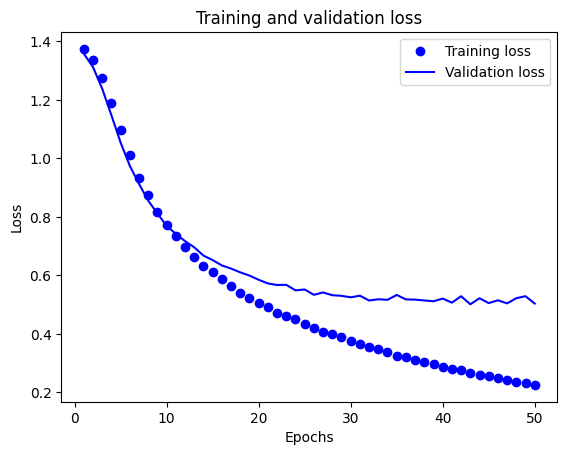

In [ ]:
# Plot accuracy over time
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

**Good Model Behavior (Training and Validation Loss):**

The training loss should decrease steadily.
The validation loss should initially decrease, then stabilize or continue to decrease along with the training loss. This suggests the model is learning and generalizing well.

When the loss curve becomes horizontal, it means the model has learned all it can and there would be no reason for additional epochs.



---



# **Question 5.**

Once these changes are complete, you will be able to train a multi-class classifier.

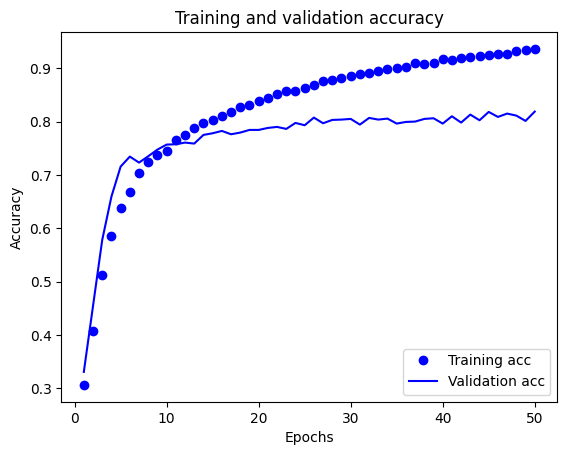

In [ ]:
# Train a multi-class classifier
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

**Good Model Behavior (Training and Validation Accuracy):**

The training accuracy should increase and eventually plateau as the model converges on a good solution.
The validation accuracy should also increase; however, it may plateau or level off. If both the training and validation accuracies stabilize and are at a high level, it suggests the model is learning well and generalizing effectively.

When the accuracy increases steadily and eventually plateaus at a high value, this means the model is learning well and generalizing to unseen data.